In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("1000_Companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

<Axes: >

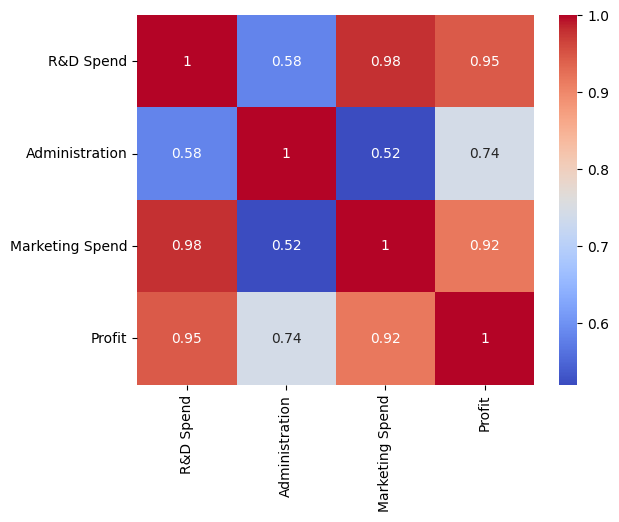

In [25]:
companies_df = df.select_dtypes(include='number')
sns.heatmap(companies_df.corr(), cmap='coolwarm', annot=True)

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [40]:
X = X[:, 1:]

In [41]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]
X_train

array([[0.0, 38385.0, 116125.9672, 142843.0015],
       [0.0, 125610.0, 129007.7526, 311143.8772],
       [0.0, 101322.0, 125420.7901, 264280.1149],
       ...,
       [0.0, 22876.0, 113835.5275, 112918.3436],
       [0.0, 66766.0, 120317.4026, 197604.2185],
       [0.0, 112108.0, 127013.7157, 285091.7313]], dtype=object)

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)
y_pred

array([ 89367.45616735,  88004.03124811,  94471.07549883, 176130.70148887,
        83413.96004914, 110571.77052674, 131980.90458126,  91050.07174837,
       164592.22578901,  53683.30649356,  66529.01692395, 151018.45736339,
       126488.8220895 ,  58917.34788371, 177083.12536118,  75319.21481674,
       118702.97107056, 164144.74669324, 171467.57609701, 182062.76954331,
       118993.06699255,  85247.15018025, 181441.96643238,  83722.41382013,
       104581.35583269, 100809.41380087,  53929.94908384,  56885.95072797,
        68475.05069478, 209552.22974679, 121233.32972377, 111299.80561441,
       101488.56363594, 138412.13998384,  63549.04546043, 108433.09541113,
       186008.03541058, 171892.84397986, 175094.18963918, 118126.36841624,
        96732.45029194, 165022.52117452, 107299.62512652,  50655.28484514,
       116968.8730889 ,  58212.039361  , 158867.8033466 ,  78999.76402067,
       160178.88780223, 131591.58346382, 185329.74371237, 175059.0100745 ,
        93322.16053642,  

In [45]:
model.coef_ #calculate the coefficient

array([-2.73274122e+02,  5.27896578e-01,  8.45343994e-01,  1.06399819e-01])

In [46]:
model.intercept_ #calculate the intercept

-51479.39925091408

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9115541316406403

In [48]:
new_data = np.array([[136133, 130561.8371, 331448.0344, "California"]], dtype=object)
new_data[:, 3] = labelencoder.fit_transform(new_data[:, 3])
new_data_transformed = ct.fit_transform(new_data)

In [49]:
predict = model.predict(new_data_transformed)
predict

array([165747.14703324])